In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from pathlib import Path
from collections import Counter

pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="white", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"

def category_to_color(i):
    # 类别转换为颜色
    i = i.lower()
    if i == "fake" or i == "fake & extreme bias" or i == "fake &\n extreme bias":
        c = "#282828"
    elif i == "farRight" or i=="extreme bias right":
        c = "#4F0906"
    elif i == "right":
        c = "#8F100B"
    elif i == "leanRight" or i=="lean right" or i=="leaning right":
        c = "#DB4742"
    elif i == "center":
        c = "#CFDB00"
    elif i == "leanLeft" or i=="lean left" or i=="leaning left":
        c = "#4495DB"
    elif i == "left":
        c = "#0E538F"
    elif i == "farLeft" or i=="extreme bias left":
        c = "#082E4F"
    else:
        c = "#D3D3D3"
        c = "#282828"
    return c


For the flow of users, you could compute two things:

1. the number of users in each category in 2016 and in 2020 (independently)

2. the flow of users from categories to categories (what you already did)

The you could you make a new flow plot where the size of each category is given by the number of users you find each year (1) and then you create the flows from categories to categories from (1) based on the proportions computed from (2).

It's a bit complicated to explain, so let me know if it's not clear.

1. 组合所有的数据
2. 查看每个用户在不同媒体类型上的比例
3. 用户定义与分类

In [4]:
for i, line in enumerate(open("data/2016csv/center_user_list.csv")):
    print(line.strip())
    if i > 10:
        break

tweet_id,user_id,datetime_EST
299233386009075712,25073877,2013-02-06 14:09:33
456276010074259456,281310593,2014-04-15 22:40:52
582919994750701569,7768402,2015-03-31 09:58:51
593515415134834688,6724252,2015-04-29 15:41:16
650678212142325760,485310129,2015-10-04 09:25:49
672786601542598657,317225299,2015-12-04 09:36:40
673979570249404416,23365014,2015-12-07 16:37:06
673981475700604932,18345986,2015-12-07 16:44:40
686342936217260032,3331835352,2016-01-10 19:24:42
692436173625622528,388234633,2016-01-27 14:57:03
709380652244729857,42231269,2016-03-14 09:08:21


In [3]:
for i, line in enumerate(open("data/2020-from-Alessandro.csv")):
    # print(line.strip())
    pass
print(i)

28711470


In [8]:
i = 0

for line in tqdm(open("data/2020-from-Alessandro.csv")):
    i += 1
    if i == 1:
        continue
    
    values = line.strip().split(",")
    values = [v[1: -1] for v in values]
    user_id = values[0]
    tweet_id = values[1]
    category = values[2]

    with open(f"data/2020csv/{category}_user_list.csv", "a") as f:
        f.write(f"{tweet_id},{user_id}\n")

# !!! 分析所有用户的类型

In [2]:
from pathlib import Path
from collections import Counter

# simple_category = {
#     "farRight": "Fake & extreme bias",
#     "right": "Right",
#     "leanRight": "Leaning right",
#     "center": "Center",
#     "leanLeft": "Leaning left",
#     "left": "Left",
#     "farLeft": "Fake & extreme bias",
#     "fake": "Fake & extreme bias"
# }

simple_category = {
    "farRight": "Fake & extreme bias",
    "right": "Right",
    "leanRight": "Right",
    "center": "Center",
    "leanLeft": "Left",
    "left": "Left",
    "farLeft": "Fake & extreme bias",
    "fake": "Fake & extreme bias"
}

users_2016 = {}
for file_name in Path("data/2016csv").glob("*.csv"):
    print(file_name)
    # category = file_name.name.split("_")[0]
    category = simple_category[file_name.name.split("_")[0]]
    for line in open(file_name):
        if line.startswith("tweet_id"):
            continue
        values = line.strip().split(",")
        tweet_id = values[0]
        user_id = int(values[1])

        if user_id not in users_2016:
            users_2016[user_id] = Counter()

        users_2016[user_id][category] += 1
print(len(users_2016))

users_2020 = {}
for file_name in Path("data/2020csv").glob("*.csv"):
    print(file_name)
    # category = file_name.name.split("_")[0]
    category = simple_category[file_name.name.split("_")[0]]
    for line in open(file_name):
        values = line.strip().split(",")
        tweet_id = values[0]
        user_id = int(values[1])

        if user_id not in users_2020:
            users_2020[user_id] = Counter()

        users_2020[user_id][category] += 1
print(len(users_2020))

data/2016csv/farRight_user_list.csv
data/2016csv/left_user_list.csv
data/2016csv/right_user_list.csv
data/2016csv/leanRight_user_list.csv
data/2016csv/farLeft_user_list.csv
data/2016csv/fake_user_list.csv
data/2016csv/leanLeft_user_list.csv
data/2016csv/center_user_list.csv
2209289
data/2020csv/farRight_user_list.csv
data/2020csv/left_user_list.csv
data/2020csv/right_user_list.csv
data/2020csv/leanRight_user_list.csv
data/2020csv/farLeft_user_list.csv
data/2020csv/fake_user_list.csv
data/2020csv/leanLeft_user_list.csv
data/2020csv/center_user_list.csv
3650478


In [5]:
from collections import defaultdict

users_2016_prop = defaultdict(
    lambda: {
        "center": 0,
        "fake": 0,
        "farLeft": 0,
        "farRight": 0,
        "leanLeft": 0,
        "leanRight": 0,
        "left": 0,
        "right": 0,
    }
)

for u, c in users_2016.items():
    _sum = sum(c.values())
    for _ca, it_c in c.items():
        users_2016_prop[u][_ca] = round(it_c / _sum, 4)
    # print(users_2016[u])

# 判断类型，最大的那一类
users_2016_category = {u: max(v, key=v.get) for u, v in users_2016_prop.items()}

users_2020_prop = defaultdict(
    lambda: {
        "center": 0,
        "fake": 0,
        "farLeft": 0,
        "farRight": 0,
        "leanLeft": 0,
        "leanRight": 0,
        "left": 0,
        "right": 0,
    }
)

for u, c in users_2020.items():
    _sum = sum(c.values())
    for _ca, it_c in c.items():
        users_2020_prop[u][_ca] = round(it_c / _sum, 4)

# 判断类型，最大的那一类
users_2020_category = {u: max(v, key=v.get) for u, v in users_2020_prop.items()}

users_counter_cat_2016 = Counter(users_2016_category.values())
users_counter_cat_2020 = Counter(users_2020_category.values())

print(users_counter_cat_2016)
print(users_counter_cat_2020)

Counter({'Left': 1233054, 'Center': 482178, 'Fake & extreme bias': 248823, 'Right': 245234})
Counter({'Left': 2397152, 'Right': 698138, 'Center': 309556, 'Fake & extreme bias': 245632})


In [22]:
# 用户交集总量

count_union = len(set(users_2016_category.keys()) & set(users_2020_category.keys()))

                       count
category                    
Fake & extreme bias   248823
Right                 245234
Center                482178
Left                 1233054


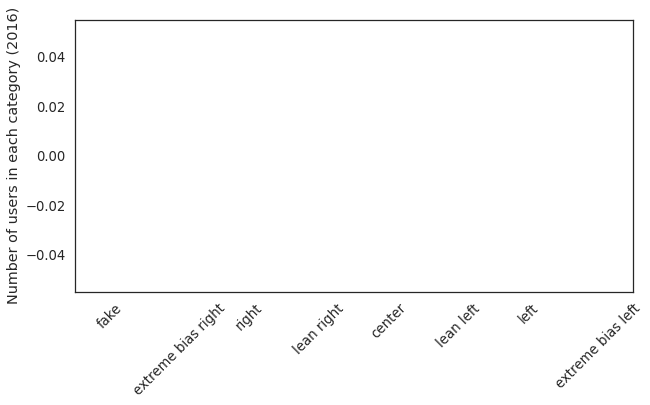

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="white", font_scale=1.2)

figure = plt.figure(figsize=(10, 5))
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

df = pd.DataFrame({"category": users_counter_cat_2016.keys(), "count": users_counter_cat_2016.values()}).set_index("category")
print(df)
df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Number of users in each category (2016)")

plt.xticks(rotation=45)
# plt.show()
plt.savefig("fig/N_users_flow_2016.png", dpi=300, bbox_inches="tight")

                       count
category                    
Fake & extreme bias   245632
Right                 698138
Left                 2397152
Center                309556


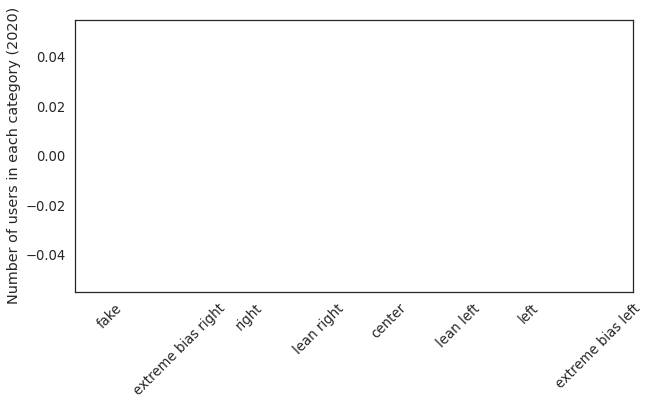

In [12]:
figure = plt.figure(figsize=(10, 5))
colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]

df = pd.DataFrame({"category": users_counter_cat_2020.keys(), "count": users_counter_cat_2020.values()}).set_index("category")
print(df)

df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Number of users in each category (2020)")

plt.xticks(rotation=45)
# plt.show()
plt.savefig("fig/N_users_flow_2020.png", dpi=300, bbox_inches="tight")

In [29]:
# 判断完成，计算flow的变化

users_flow_cat = users_2016_category

for u, c in users_2020_category.items():
    if u not in users_flow_cat:
        users_flow_cat[u] = "None to " + c
    else:
        users_flow_cat[u] =  users_flow_cat[u] + " to " + c

for u, v in users_flow_cat.items():
    if v.find("to") == -1:
        users_flow_cat[u] = users_flow_cat[u] + " to None"

In [30]:
users_flow_cat = Counter(users_flow_cat.values())
users_flow_cat = sorted(users_flow_cat.items())
users_flow_cat

[('Center to Center', 8450),
 ('Center to Fake & extreme bias', 2980),
 ('Center to Left', 65414),
 ('Center to None', 395299),
 ('Center to Right', 10035),
 ('Fake & extreme bias to Center', 1754),
 ('Fake & extreme bias to Fake & extreme bias', 19552),
 ('Fake & extreme bias to Left', 9591),
 ('Fake & extreme bias to None', 183583),
 ('Fake & extreme bias to Right', 34343),
 ('Left to Center', 18719),
 ('Left to Fake & extreme bias', 4870),
 ('Left to Left', 303084),
 ('Left to None', 888519),
 ('Left to Right', 17862),
 ('None to Center', 278092),
 ('None to Fake & extreme bias', 208348),
 ('None to Left', 2003364),
 ('None to Right', 608246),
 ('Right to Center', 2541),
 ('Right to Fake & extreme bias', 9882),
 ('Right to Left', 15699),
 ('Right to None', 189460),
 ('Right to Right', 27652)]

In [4]:
# 8 + 1类

df = pd.read_csv("data/PNAS_flow.csv", index_col="2016 to 2020")
df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"}, columns={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left,None
2016 to 2020,,,,,,,,,
fake,3555,3233,3727,1910,1245,1539,238,2,59149
extreme bias right,5030,7701,9131,3784,2092,2623,373,1,101166
right,4196,6806,10627,5008,2534,4018,572,3,122350
lean right,644,524,653,1234,1027,2625,381,2,44275
center,2848,3890,4865,5999,19514,55106,9252,60,564252
lean left,1579,2442,2866,5649,23542,118044,18948,111,674574
left,378,521,513,1223,6481,29364,10108,65,211577
extreme bias left,33,44,42,79,478,1791,610,22,18441
None,88204,125888,145637,190282,304062,827510,193089,874,304062


In [5]:
# 删除没有类的用户
df = df.drop(["None"], axis=1).drop(["None"])

In [6]:
df.sum(axis=1)

2016 to 2020
fake                   15449
extreme bias right     30735
right                  33764
lean right              7090
center                101534
lean left             173181
left                   48653
extreme bias left       3099
dtype: int64

In [7]:
df_prop = df.div(df.sum(axis=1), axis=0)

In [8]:
df_prop = df_prop.round(2)

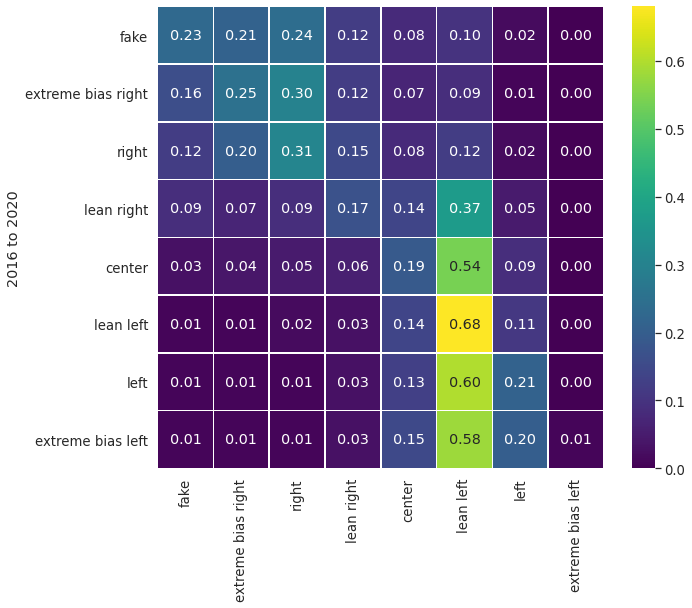

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

fig = plt.figure(figsize=(10, 8.5))
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-from-2016-to-2020.png", dpi=300, bbox_inches='tight')

In [9]:
df_prop1 = df_prop
df_prop1["right"] = df_prop["extreme bias right"] + df_prop["lean right"] + df_prop["right"]
df_prop1["left"] = df_prop["extreme bias left"] + df_prop["lean left"] + df_prop["left"]
df_prop1 = df_prop1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"])
df_prop1 = df_prop1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"], axis=1)

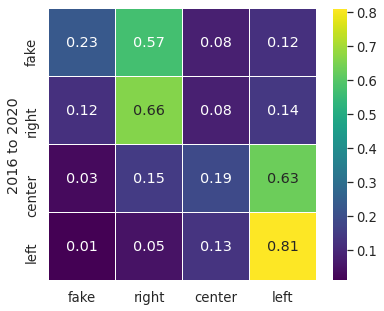

In [10]:
fig = plt.figure(figsize=(6, 5))
sns.heatmap(df_prop1, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-from-2016-to-2020-2.png", dpi=300, bbox_inches='tight')

In [17]:
df_prop2 = df_prop
df_prop2["right"] = df_prop["lean right"] + df_prop["right"]
df_prop2["left"] = df_prop["lean left"] + df_prop["left"]
df_prop2["fake & extreme bias"] = df_prop["fake"] + df_prop["extreme bias left"] + df_prop["extreme bias right"]
df_prop2 = df_prop2.drop(["extreme bias right", "lean right", "extreme bias left", "lean left", "fake"])
df_prop2 = df_prop2.drop(["extreme bias right", "lean right", "extreme bias left", "lean left", "fake"], axis=1)
df_prop2

,right,center,left,fake & extreme bias
2016 to 2020,,,,
right,1.46,0.08,0.50,0.32
center,0.43,0.19,2.25,0.07
left,0.18,0.13,2.61,0.02


In [29]:
df = pd.read_csv("data/PNAS_flow.csv", index_col="2016 to 2020")
df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"}, columns={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df = df.drop(["None"], axis=1).drop(["None"])
df

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left
2016 to 2020,,,,,,,,
fake,3555,3233,3727,1910,1245,1539,238,2
extreme bias right,5030,7701,9131,3784,2092,2623,373,1
right,4196,6806,10627,5008,2534,4018,572,3
lean right,644,524,653,1234,1027,2625,381,2
center,2848,3890,4865,5999,19514,55106,9252,60
lean left,1579,2442,2866,5649,23542,118044,18948,111
left,378,521,513,1223,6481,29364,10108,65
extreme bias left,33,44,42,79,478,1791,610,22


In [31]:
df["fake & extreme bias"] = df["fake"] + df["extreme bias left"] + df["extreme bias right"]
df["left"] = df["left"] + df["lean left"]
df["right"] = df["right"] + df["lean right"]
df

df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
df.loc["left"] = df.loc["left"] + df.loc["lean left"]
df.loc["right"] = df.loc["right"] + df.loc["lean right"]
df

df = df.loc[["fake & extreme bias", "right", "center", "left"]]
df = df[["fake & extreme bias", "right", "center", "left"]]
df

df_prop = df.div(df.sum(axis=1), axis=0)

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left,fake & extreme bias
2016 to 2020,,,,,,,,,
fake,3555,3233,5637,1910,1245,1539,1777,2,6790
extreme bias right,5030,7701,12915,3784,2092,2623,2996,1,12732
right,4840,7330,17522,6242,3561,6643,7596,5,12175
lean right,644,524,1887,1234,1027,2625,3006,2,1170
center,2848,3890,10864,5999,19514,55106,64358,60,6798
lean left,1579,2442,8515,5649,23542,118044,136992,111,4132
left,1957,2963,10251,6872,30023,147408,176464,176,5096
extreme bias left,33,44,121,79,478,1791,2401,22,99
fake & extreme bias,8618,10978,18673,5773,3815,5953,7174,25,19621


In [34]:
df_prop = df.div(df.sum(axis=1), axis=0)

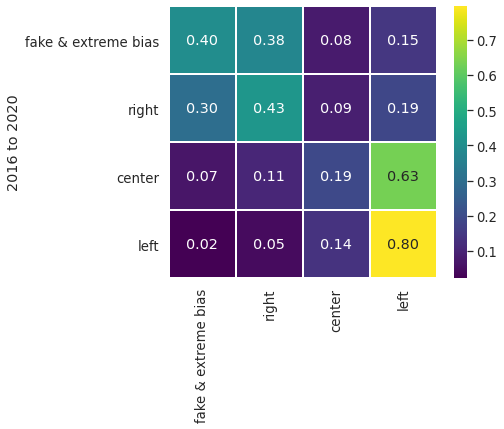

In [35]:
fig = plt.figure(figsize=(6, 5))
# sns.heatmap(df, annot=True, linewidths=.5, cmap="viridis")
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-from-2016-to-2020-3.png", dpi=300, bbox_inches='tight')

In [80]:
from ipysankeywidget import SankeyWidget
import pandas as pd
from tqdm.notebook import tqdm

In [81]:
df = pd.read_csv("data/PNAS_flow.csv", index_col="2016 to 2020")

In [82]:
df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"}, columns={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left,None
2016 to 2020,,,,,,,,,
fake,3555,3233,3727,1910,1245,1539,238,2,59149
extreme bias right,5030,7701,9131,3784,2092,2623,373,1,101166
right,4196,6806,10627,5008,2534,4018,572,3,122350
lean right,644,524,653,1234,1027,2625,381,2,44275
center,2848,3890,4865,5999,19514,55106,9252,60,564252
lean left,1579,2442,2866,5649,23542,118044,18948,111,674574
left,378,521,513,1223,6481,29364,10108,65,211577
extreme bias left,33,44,42,79,478,1791,610,22,18441
None,88204,125888,145637,190282,304062,827510,193089,874,304062


In [12]:
flow_list_dict = []

for i, row in df.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,fake(2016),fake(2020),#282828,3555
1,fake(2016),extreme bias right(2020),#282828,3233
2,fake(2016),right(2020),#282828,3727
3,fake(2016),lean right(2020),#282828,1910
4,fake(2016),center(2020),#282828,1245
5,fake(2016),lean left(2020),#282828,1539
6,fake(2016),left(2020),#282828,238
7,fake(2016),extreme bias left(2020),#282828,2
8,extreme bias right(2016),fake(2020),#4F0906,5030
9,extreme bias right(2016),extreme bias right(2020),#4F0906,7701


In [86]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["fake(2016)", "extreme bias right(2016)", "right(2016)", "lean right(2016)", "center(2016)", "lean left(2016)", "left(2016)", "extreme bias left(2016)"],
    ["fake(2020)", "extreme bias right(2020)", "right(2020)", "lean right(2020)", "center(2020)", "lean left(2020)", "left(2020)", "extreme bias left(2020)"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'fake(2016)', 'target': 'fake(2020)',…

In [87]:
flow_list_dict = []

for i, row in df.iterrows():

    if i == "None":
        source = "entering"
    else:
        source = i + "(2016)"
    c = category_to_color(i)

    for j, v in row.iteritems():


        if j == "None":
            target = "leaving"
        else:
            target = j + "(2020)"
        
        # print(i, j, v)
        flow_list_dict.append(
            {
                "source": source,
                "target": target,
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
# df_flow

In [88]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["fake(2016)", "extreme bias right(2016)", "right(2016)", "lean right(2016)", "center(2016)", "lean left(2016)", "left(2016)", "extreme bias left(2016)", "entering"],
    ["fake(2020)", "extreme bias right(2020)", "right(2020)", "lean right(2020)", "center(2020)", "lean left(2020)", "left(2020)", "extreme bias left(2020)", "leaving"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'fake(2016)', 'target': 'fake(2020)',…

In [52]:
df.columns.to_list()

['fake',
 'extreme bias right',
 'right',
 'lean right',
 'center',
 'lean left',
 'left',
 'extreme bias left',
 'None']

In [89]:
df_1 = df

df_1["right"] = df_1["extreme bias right"] + df_1["lean right"] + df_1["right"]
df_1["left"] = df_1["extreme bias left"] + df_1["lean left"] + df_1["left"]

df_1.loc["right"] = df_1.loc["extreme bias right"] + df_1.loc["lean right"] + df_1.loc["right"]
df_1.loc["left"] = df_1.loc["extreme bias left"] + df_1.loc["lean left"] + df_1.loc["left"]

# df_1["fake & extreme bias"] = df["fake"] + df["extreme bias left"] + df["extreme bias right"]
# df_1["left"] = df["left"] + df["lean left"]
# df_1["right"] = df["right"] + df["lean right"]

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
# df.loc["left"] = df.loc["left"] + df.loc["lean left"]
# df.loc["right"] = df.loc["right"] + df.loc["lean right"]

df_1 = df_1.loc[["fake", "right", "center", "left", "None"]]
df_1 = df_1[["fake", "right", "center", "left", "None"]]
df_1

# df_1["right"] = df_1["extreme bias right"] + df_1["lean right"] + df_1["right"]
# df_1["left"] = df_1["extreme bias left"] + df_1["lean left"] + df_1["left"]
# df_1 = df_1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"])
# df_1 = df_1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"], axis=1)

,fake,right,center,left,None
2016 to 2020,,,,,
fake,3555,8870,1245,1779,59149
right,9870,45468,5653,10598,267791
center,2848,14754,19514,64418,564252
left,1990,13379,30501,179063,904592
None,88204,461807,304062,1021473,304062


In [90]:
flow_list_dict = []

for i, row in df_1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,fake(2016),fake(2020),#282828,3555
1,fake(2016),right(2020),#282828,8870
2,fake(2016),center(2020),#282828,1245
3,fake(2016),left(2020),#282828,1779
4,right(2016),fake(2020),#8F100B,9870
5,right(2016),right(2020),#8F100B,45468
6,right(2016),center(2020),#8F100B,5653
7,right(2016),left(2020),#8F100B,10598
8,center(2016),fake(2020),#CFDB00,2848
9,center(2016),right(2020),#CFDB00,14754


In [91]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["fake(2016)", "extreme bias right(2016)", "right(2016)", "lean right(2016)", "center(2016)", "lean left(2016)", "left(2016)", "extreme bias left(2016)", "entering"],
    ["fake(2020)", "extreme bias right(2020)", "right(2020)", "lean right(2020)", "center(2020)", "lean left(2020)", "left(2020)", "extreme bias left(2020)", "leaving"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'fake(2016)', 'target': 'fake(2020)',…

In [157]:
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.5)

flow_list_dict = []

for i, row in df_1.iterrows():

    if i == "None":
        source = "entering"
    else:
        source = i + "(2016)"
    c = category_to_color(i)

    for j, v in row.iteritems():


        if j == "None":
            target = "leaving"
        else:
            target = j + "(2020)"
        
        # print(i, j, v)
        flow_list_dict.append(
            {
                "source": source,
                "target": target,
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

NameError: name 'df_1' is not defined

In [93]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["fake(2016)", "extreme bias right(2016)", "right(2016)", "lean right(2016)", "center(2016)", "lean left(2016)", "left(2016)", "extreme bias left(2016)", "entering"],
    ["fake(2020)", "extreme bias right(2020)", "right(2020)", "lean right(2020)", "center(2020)", "lean left(2020)", "left(2020)", "extreme bias left(2020)", "leaving"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'fake(2016)', 'target': 'fake(2020)',…

In [94]:
df_1 = df

df_1["fake & extreme bias"] = df_1["fake"] + df_1["extreme bias left"] + df_1["extreme bias right"]
df_1["left"] = df["left"] + df_1["lean left"]
df_1["right"] = df["right"] + df_1["lean right"]

df_1.loc["fake & extreme bias"] = df_1.loc["fake"] + df_1.loc["extreme bias left"] + df_1.loc["extreme bias right"]
df_1.loc["left"] = df_1.loc["left"] + df_1.loc["lean left"]
df_1.loc["right"] = df_1.loc["right"] + df_1.loc["lean right"]

df_1 = df_1.loc[["fake & extreme bias", "right", "center", "left", "None"]]
df_1 = df_1[["fake & extreme bias", "right", "center", "left", "None"]]
df_1

# df_1["right"] = df_1["extreme bias right"] + df_1["lean right"] + df_1["right"]
# df_1["left"] = df_1["extreme bias left"] + df_1["lean left"] + df_1["left"]
# df_1 = df_1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"])
# df_1 = df_1.drop(["extreme bias right", "lean right", "extreme bias left", "lean left"], axis=1)

,fake & extreme bias,right,center,left,None
2016 to 2020,,,,,
fake & extreme bias,19621,35424,3815,13152,178756
right,26077,59139,6680,25497,312066
center,6798,20753,19514,119524,564252
left,9327,36936,54043,583409,1579166
None,214966,652089,304062,1848983,304062


In [100]:
sns.set(style="darkgrid", font_scale=1.5)

flow_list_dict = []

for i, row in df_1.iterrows():

    if i == "None":
        source = "entering"
    else:
        source = i + "(2016)"
    c = category_to_color(i)

    for j, v in row.iteritems():


        if j == "None":
            target = "leaving"
        else:
            target = j + "(2020)"
        
        # print(i, j, v)
        flow_list_dict.append(
            {
                "source": source,
                "target": target,
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,fake & extreme bias(2016),fake & extreme bias(2020),#282828,19621
1,fake & extreme bias(2016),right(2020),#282828,35424
2,fake & extreme bias(2016),center(2020),#282828,3815
3,fake & extreme bias(2016),left(2020),#282828,13152
4,fake & extreme bias(2016),leaving,#282828,178756
5,right(2016),fake & extreme bias(2020),#8F100B,26077
6,right(2016),right(2020),#8F100B,59139
7,right(2016),center(2020),#8F100B,6680
8,right(2016),left(2020),#8F100B,25497
9,right(2016),leaving,#8F100B,312066


In [101]:
# Set the default size to fit the documentation better.
layout = Layout(width="900", height="800")

order = [
    ["fake & extreme bias(2016)", "right(2016)", "center(2016)", "left(2016)", "entering"],
    ["fake & extreme bias(2020)", "right(2020)", "center(2020)", "left(2020)", "leaving"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=200, right=200), layout=layout, order=order)
sw.save_png("flow3.png")
sw

SankeyWidget(layout=Layout(height='800', width='900'), links=[{'source': 'fake & extreme bias(2016)', 'target'…

In [102]:
# Set the default size to fit the documentation better.
layout = Layout(width="900", height="800")

order = [
    ["fake & extreme bias(2016)", "right(2016)", "center(2016)", "left(2016)", "entering"],
    ["fake & extreme bias(2020)", "right(2020)", "center(2020)", "left(2020)", "leaving"],
]

df_flow1 = df_flow.loc[(df_flow.source != "entering") & (df_flow.target != "leaving")]
# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow1.to_dict('records'), margins=dict(top=0, bottom=0, left=200, right=200), layout=layout, order=order)
sw.save_png("flow3.png")
sw

SankeyWidget(layout=Layout(height='800', width='900'), links=[{'source': 'fake & extreme bias(2016)', 'target'…

In [3]:
df = pd.read_csv("data/PNAS_flow.csv", index_col="2016 to 2020")
df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"}, columns={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
df

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left,None
2016 to 2020,,,,,,,,,
fake,3555,3233,3727,1910,1245,1539,238,2,59149
extreme bias right,5030,7701,9131,3784,2092,2623,373,1,101166
right,4196,6806,10627,5008,2534,4018,572,3,122350
lean right,644,524,653,1234,1027,2625,381,2,44275
center,2848,3890,4865,5999,19514,55106,9252,60,564252
lean left,1579,2442,2866,5649,23542,118044,18948,111,674574
left,378,521,513,1223,6481,29364,10108,65,211577
extreme bias left,33,44,42,79,478,1791,610,22,18441
None,88204,125888,145637,190282,304062,827510,193089,874,304062


In [4]:
df = df.drop(["None"], axis=1).drop(["None"])
df

,fake,extreme bias right,right,lean right,center,lean left,left,extreme bias left
2016 to 2020,,,,,,,,
fake,3555,3233,3727,1910,1245,1539,238,2
extreme bias right,5030,7701,9131,3784,2092,2623,373,1
right,4196,6806,10627,5008,2534,4018,572,3
lean right,644,524,653,1234,1027,2625,381,2
center,2848,3890,4865,5999,19514,55106,9252,60
lean left,1579,2442,2866,5649,23542,118044,18948,111
left,378,521,513,1223,6481,29364,10108,65
extreme bias left,33,44,42,79,478,1791,610,22


In [5]:
df.sum(axis=1)

2016 to 2020
fake                   15449
extreme bias right     30735
right                  33764
lean right              7090
center                101534
lean left             173181
left                   48653
extreme bias left       3099
dtype: int64

In [13]:
flow_list_dict = []

for i, row in df_prop.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,fake(2016),fake(2020),#282828,132.818696
1,fake(2016),extreme bias right(2020),#282828,120.788423
2,fake(2016),right(2020),#282828,139.244805
3,fake(2016),lean right(2020),#282828,71.359693
4,fake(2016),center(2020),#282828,46.514565
5,fake(2016),lean left(2020),#282828,57.498727
6,fake(2016),left(2020),#282828,8.891941
7,fake(2016),extreme bias left(2020),#282828,0.074722
8,extreme bias right(2016),fake(2020),#4F0906,373.869844
9,extreme bias right(2016),extreme bias right(2020),#4F0906,572.399935


In [14]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["fake(2016)", "extreme bias right(2016)", "right(2016)", "lean right(2016)", "center(2016)", "lean left(2016)", "left(2016)", "extreme bias left(2016)", "entering"],
    ["fake(2020)", "extreme bias right(2020)", "right(2020)", "lean right(2020)", "center(2020)", "lean left(2020)", "left(2020)", "extreme bias left(2020)", "leaving"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.auto_save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'fake(2016)', 'target': 'fake(2020)',…

# 关键点，由公式计算而得

1. 获取users_2016和users_2020
2. 判断每个用户的类型
3. 计算flow
4. 画图flow

In [3]:
# 只有四类！

from collections import defaultdict

users_2016_prop = defaultdict(
    lambda: {
        "Center": 0,
        "Fake & extreme bias": 0,
        # "leaning left": 0,
        # "Leaning right": 0,
        "Left": 0,
        "Right": 0,
    }
)

for u, c in users_2016.items():
    _sum = sum(c.values())
    for _ca, it_c in c.items():
        users_2016_prop[u][_ca] = round(it_c / _sum, 4)
    # print(users_2016[u])

# 判断类型，最大的那一类

users_2016_category = {u: max(v, key=v.get) for u, v in users_2016_prop.items()}

users_2020_prop = defaultdict(
    lambda: {
        "Center": 0,
        "Fake & extreme bias": 0,
        # "Leaning left": 0,
        # "Leaning right": 0,
        "Left": 0,
        "Right": 0,
    }
)

for u, c in users_2020.items():
    _sum = sum(c.values())
    for _ca, it_c in c.items():
        users_2020_prop[u][_ca] = round(it_c / _sum, 4)

# 判断类型，最大的那一类

users_2020_category = {u: max(v, key=v.get) for u, v in users_2020_prop.items()}

users_counter_cat_2016 = Counter(users_2016_category.values())
users_counter_cat_2020 = Counter(users_2020_category.values())

print(users_counter_cat_2016)
print(users_counter_cat_2020)

count_union = len(set(users_2016_category.keys()) & set(users_2020_category.keys()))

count_union

Counter({'Left': 1150048, 'Center': 619529, 'Fake & extreme bias': 241691, 'Right': 198021})
Counter({'Left': 2343938, 'Right': 601173, 'Center': 454946, 'Fake & extreme bias': 250421})


552428

                       count
category                    
Fake & extreme bias   241691
Right                 198021
Center                619529
Left                 1150048
                       count
category                    
Fake & extreme bias   250421
Right                 601173
Left                 2343938
Center                454946


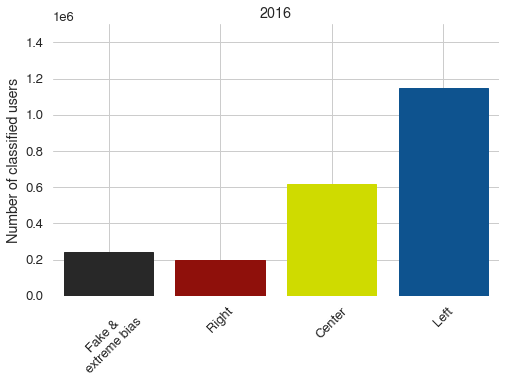

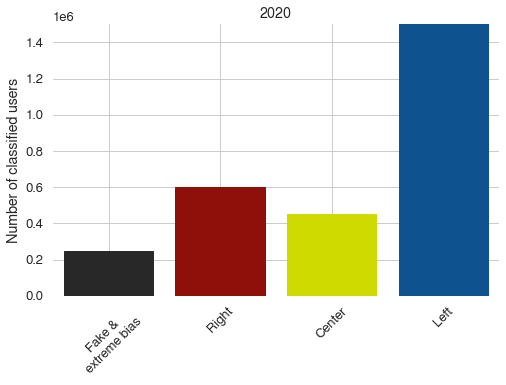

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.rcParams["font.family"] = "FreeSans"

pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="white", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"
# f, ax = plt.subplots(1, 2)

figure = plt.figure(figsize=(8, 5))
# colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
colors = ["#282828", "#8F100B", "#CFDB00", "#0E538F"]

df = pd.DataFrame({"category": users_counter_cat_2016.keys(), "count": users_counter_cat_2016.values()}).set_index("category")
print(df)
df = df.rename(index={"Fake & extreme bias": "Fake &\n extreme bias"})
# df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
# df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])
# df = df.reindex(["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"])
df = df.reindex(["Fake &\n extreme bias", "Right", "Center", "Left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax = plt.gca()  # 获取当前图像的坐标轴信息
# ax.xaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
ax.yaxis.get_major_formatter().set_powerlimits((6,6)) # 将坐标轴的base number设置为一位。
ax.set_ylim(0, 1500000)

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.title("2016")
plt.xlabel("")
plt.ylabel("Number of classified users")

plt.xticks(rotation=45)
# plt.show()
plt.grid()
plt.savefig("fig/N_users_flow_2016.png", dpi=300, bbox_inches="tight")

# 2020
figure = plt.figure(figsize=(8, 5))
# colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
colors = ["#282828", "#8F100B", "#CFDB00", "#0E538F"]

df = pd.DataFrame({"category": users_counter_cat_2020.keys(), "count": users_counter_cat_2020.values()}).set_index("category")
print(df)
df = df.rename(index={"Fake & extreme bias": "Fake &\n extreme bias"})
# df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])
# df = df.reindex(["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"])
df = df.reindex(["Fake &\n extreme bias", "Right", "Center", "Left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax = plt.gca()  # 获取当前图像的坐标轴信息
# ax.xaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
ax.yaxis.get_major_formatter().set_powerlimits((6,6)) # 将坐标轴的base number设置为一位。
ax.set_ylim(0, 1500000)

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Number of classified users")
plt.title("2020")

plt.xticks(rotation=45)
# plt.show()
plt.grid()
plt.savefig("fig/N_users_flow_2020.png", dpi=300, bbox_inches="tight")

In [9]:
# 判断完成，计算flow的变化

users_flow_cat = users_2016_category

for u, c in users_2020_category.items():
    if u not in users_flow_cat:
        users_flow_cat[u] = "None to " + c
    else:
        users_flow_cat[u] =  users_flow_cat[u] + " to " + c

for u, v in users_flow_cat.items():
    if v.find("to") == -1:
        users_flow_cat[u] = users_flow_cat[u] + " to None"

In [10]:
users_flow_cat = Counter(users_flow_cat.values())
users_flow_cat = sorted(users_flow_cat.items())
users_flow_cat

[('Center to Center', 17165),
 ('Center to Fake & extreme bias', 4861),
 ('Center to Left', 89512),
 ('Center to None', 495513),
 ('Center to Right', 12478),
 ('Fake & extreme bias to Center', 3312),
 ('Fake & extreme bias to Fake & extreme bias', 19851),
 ('Fake & extreme bias to Left', 9513),
 ('Fake & extreme bias to None', 178052),
 ('Fake & extreme bias to Right', 30963),
 ('Left to Center', 28744),
 ('Left to Fake & extreme bias', 4573),
 ('Left to Left', 274301),
 ('Left to None', 830027),
 ('Left to Right', 12403),
 ('None to Center', 402404),
 ('None to Fake & extreme bias', 212479),
 ('None to Left', 1959814),
 ('None to Right', 523353),
 ('Right to Center', 3321),
 ('Right to Fake & extreme bias', 8657),
 ('Right to Left', 10798),
 ('Right to None', 153269),
 ('Right to Right', 21976)]

In [31]:
# df = pd.read_csv("data/PNAS_flow2.csv", index_col="#")
# 直接载入计算好的四类
df = pd.read_csv("data/PNAS_flow3.csv", index_col="#")
df

,Fake & extreme bias,Right,Center,Left
#,,,,
Fake & extreme bias,19552,34343,1754,9591
Right,9882,27652,2541,15699
Center,2980,10035,8450,65414
Left,4870,17862,18719,303084


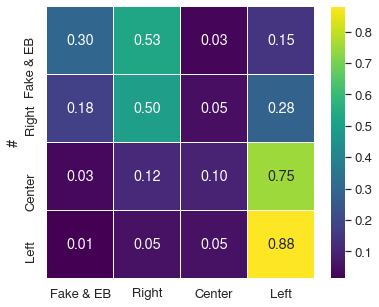

In [32]:
df["Fake & EB"] = df["Fake & extreme bias"]
# df["Left"] = df["Left"] + df["Leaning left"]
# df["Right"] = df["Right"] + df["Leaning right"]
df

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
df.loc["Fake & EB"] = df.loc["Fake & extreme bias"]
# df.loc["Left"] = df.loc["Left"] + df.loc["Leaning left"]
# df.loc["Right"] = df.loc["Right"] + df.loc["Leaning right"]
df

df = df.loc[["Fake & EB", "Right", "Center", "Left"]]
df = df[["Fake & EB", "Right", "Center", "Left"]]
df

df_prop = df.div(df.sum(axis=1), axis=0)
df_prop

fig = plt.figure(figsize=(6, 5))
# sns.heatmap(df, annot=True, linewidths=.5, cmap="viridis")
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-heatmap-based-on-2016.png", dpi=300, bbox_inches='tight')

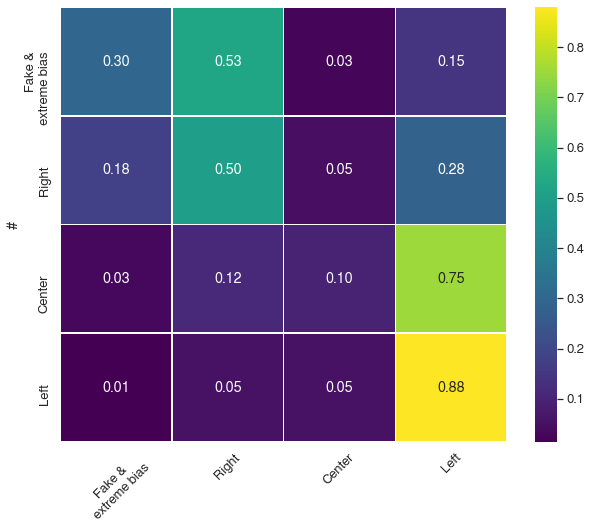

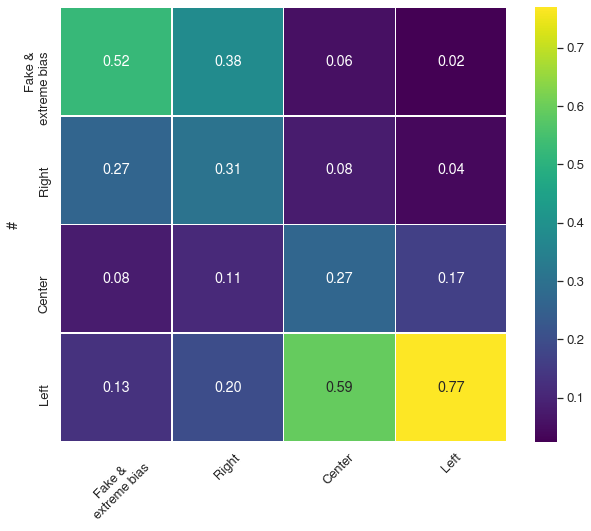

In [5]:
# df = pd.read_csv("data/PNAS_flow2.csv", index_col="2016 to 2020")
sns.set(style="white", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"

df = pd.read_csv("data/PNAS_flow3.csv", index_col="#")
df

df["Fake &\n extreme bias"] = df["Fake & extreme bias"]
# df["Left"] = df["Left"] + df["Leaning left"]
# df["Right"] = df["Right"] + df["Leaning right"]
df

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
df.loc["Fake &\n extreme bias"] = df.loc["Fake & extreme bias"]
# df.loc["Left"] = df.loc["Left"] + df.loc["Leaning left"]
# df.loc["Right"] = df.loc["Right"] + df.loc["Leaning right"]
df

# df = df.loc[["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"]]
# df = df[["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"]]
df = df.loc[["Fake &\n extreme bias", "Right", "Center", "Left"]]
df = df[["Fake &\n extreme bias", "Right", "Center", "Left"]]
df

df_prop = df.div(df.sum(axis=1), axis=0)
df_prop

fig = plt.figure(figsize=(10, 8))
plt.ylabel("")
plt.xlabel("")
plt.rcParams["font.family"] = "FreeSans"
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# sns.heatmap(df, annot=True, linewidths=.5, cmap="viridis")
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-heatmap-based-on-2016.png", dpi=300, bbox_inches='tight')


df_prop = df.div(df.sum(axis=0), axis=1)
df_prop

fig = plt.figure(figsize=(10, 8))
plt.ylabel("")
plt.xlabel("")
plt.rcParams["font.family"] = "FreeSans"
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# sns.heatmap(df, annot=True, linewidths=.5, cmap="viridis")
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-heatmap-based-on-2020.png", dpi=300, bbox_inches='tight')

In [34]:
flow_list_dict = []

for i, row in df.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,Fake &\n extreme bias(2016),Fake &\n extreme bias(2020),#282828,19552
1,Fake &\n extreme bias(2016),Right(2020),#282828,34343
2,Fake &\n extreme bias(2016),Center(2020),#282828,1754
3,Fake &\n extreme bias(2016),Left(2020),#282828,9591
4,Right(2016),Fake &\n extreme bias(2020),#8F100B,9882
5,Right(2016),Right(2020),#8F100B,27652
6,Right(2016),Center(2020),#8F100B,2541
7,Right(2016),Left(2020),#8F100B,15699
8,Center(2016),Fake &\n extreme bias(2020),#CFDB00,2980
9,Center(2016),Right(2020),#CFDB00,10035


In [35]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

# order = [
#     ["Fake & extreme bias(2016)", "Right(2016)", "Leaning right(2016)", "Center(2016)", "Leaning left(2016)", "Left(2016)"],
#     ["Fake & extreme bias(2020)", "Right(2020)", "Leaning right(2020)", "Center(2020)", "Leaning left(2020)", "Left(2020)"],
# ]

order = [
    ["Fake &\n extreme bias(2016)", "Right(2016)", "Center(2016)", "Left(2016)"],
    ["Fake &\n extreme bias(2020)", "Right(2020)", "Center(2020)", "Left(2020)"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
# sw.save_png("flow3.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake &\n extreme bias(2016)', 'targe…

In [9]:
# 2016 formula
df = pd.read_csv("data/PNAS_flow3.csv", index_col="#")
# print(df)
df["Fake &\n extreme bias"] = df["Fake & extreme bias"]
# df["Left"] = df["Left"] + df["Leaning left"]
# df["Right"] = df["Right"] + df["Leaning right"]
# df

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
df.loc["Fake &\n extreme bias"] = df.loc["Fake & extreme bias"]
# df.loc["Left"] = df.loc["Left"] + df.loc["Leaning left"]
# df.loc["Right"] = df.loc["Right"] + df.loc["Leaning right"]
# df

# df = df.loc[["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"]]
# df = df[["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"]]
df = df.loc[["Fake &\n extreme bias", "Right", "Center", "Left"]]
df = df[["Fake &\n extreme bias", "Right", "Center", "Left"]]
print(df)

# users_counter_cat_2016 = Counter(users_2016_category.values())
# users_counter_cat_2020 = Counter(users_2020_category.values())
# print(users_counter_cat_2016)
# print(users_counter_cat_2020)
# count_union = len(set(users_2016_category.keys()) & set(users_2020_category.keys()))

users_2016_fake = set([u for u, v in users_2016_category.items() if v == "Fake & extreme bias"])
print("user 2016 fake:", len(users_2016_fake))
S_fake = len(users_2016_fake & set(users_2020_category.keys()))

users_2016_right = set([u for u, v in users_2016_category.items() if v == "Right"])
S_right = len(users_2016_right & set(users_2020_category.keys()))

users_2016_center = set([u for u, v in users_2016_category.items() if v == "Center"])
S_center = len(users_2016_center & set(users_2020_category.keys()))

users_2016_left = set([u for u, v in users_2016_category.items() if v == "Left"])
S_left = len(users_2016_left & set(users_2020_category.keys()))

print(S_fake, S_right, S_center, S_left)

df_prop1 = df
# print(df.sum(), count_union)
# print(df_prop1)

df_prop1[df_prop1.index=="Fake &\n extreme bias"] = df_prop1[df_prop1.index=="Fake &\n extreme bias"] * users_counter_cat_2016["Fake & extreme bias"] / S_fake
df_prop1[df_prop1.index=="Right"] = df_prop1[df_prop1.index=="Right"] * users_counter_cat_2016["Right"] / S_right
df_prop1[df_prop1.index=="Center"] = df_prop1[df_prop1.index=="Center"] * users_counter_cat_2016["Center"] / S_center
df_prop1[df_prop1.index=="Left"] = df_prop1[df_prop1.index=="Left"] * users_counter_cat_2016["Left"] / S_left
# print(df_prop1)

# df_prop1 = df_prop1 / count_union

print(df_prop1)
print(df_prop1.sum(axis=1))
print(df_prop1.sum())

flow_list_dict = []

for i, row in df_prop1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + " ",
                "target": j + "",
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
df_flow.to_csv("data/df_flow-2016.csv", index=None)
print(df_flow)

df_prop1.to_csv("data/flow-formula-2016.csv")
df_prop1

                       Fake &\n extreme bias  Right  Center    Left
#                                                                  
Fake &\n extreme bias                  19552  34343    1754    9591
Right                                   9882  27652    2541   15699
Center                                  2980  10035    8450   65414
Left                                    4870  17862   18719  303084
user 2016 fake: 241691
63639 44752 124016 320021
                       Fake &\n extreme bias          Right        Center  \
#                                                                           
Fake &\n extreme bias           74255.447634  130429.359559   6661.418533   
Right                           43726.392608  122356.021898  11243.550255   
Center                          14886.759934   50130.414745  42212.456860   
Left                            17501.144487   64190.029329  67269.799519   

                               Left  
#                                    
Fake

,Fake &\n extreme bias,Right,Center,Left
#,,,,
Fake &\n extreme bias,74255.447634,130429.359559,6661.418533,3.642512e+04
Right,43726.392608,122356.021898,11243.550255,6.946576e+04
Center,14886.759934,50130.414745,42212.456860,3.267794e+05
Left,17501.144487,64190.029329,67269.799519,1.089182e+06


In [10]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

df_flow = pd.read_csv("data/df_flow-2016.csv")
print(df_flow)

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake &\n extreme bias ", "Right ", "Center ", "Left "],
    ["Fake &\n extreme bias", "Right", "Center", "Left"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(
    links=df_flow.to_dict('records'),
    margins=dict(top=0, bottom=0, left=180, right=180), 
    layout=layout, 
    order=order)
sw.auto_save_svg("flow2016.svg")
sw

                    source                 target    color         value
0   Fake &\n extreme bias   Fake &\n extreme bias  #282828  7.425545e+04
1   Fake &\n extreme bias                   Right  #282828  1.304294e+05
2   Fake &\n extreme bias                  Center  #282828  6.661419e+03
3   Fake &\n extreme bias                    Left  #282828  3.642512e+04
4                   Right   Fake &\n extreme bias  #8F100B  4.372639e+04
5                   Right                   Right  #8F100B  1.223560e+05
6                   Right                  Center  #8F100B  1.124355e+04
7                   Right                    Left  #8F100B  6.946576e+04
8                  Center   Fake &\n extreme bias  #CFDB00  1.488676e+04
9                  Center                   Right  #CFDB00  5.013041e+04
10                 Center                  Center  #CFDB00  4.221246e+04
11                 Center                    Left  #CFDB00  3.267794e+05
12                   Left   Fake &\n extreme bias  

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake &\n extreme bias ', 'target': '…

In [11]:
df_sum = df_prop1.sum(axis=0)
print(
df_sum["Fake &\n extreme bias"] - users_counter_cat_2016["Fake & extreme bias"],
df_sum["Right"] - users_counter_cat_2016["Right"],
df_sum["Center"] - users_counter_cat_2016["Center"],
df_sum["Left"] - users_counter_cat_2016["Left"],
)

-91321.25533594104 169084.82553204917 -492141.77483279037 371804.35963170766


In [12]:
# 2020 formula

df = pd.read_csv("data/PNAS_flow3.csv", index_col="#")

df["Fake &\n extreme bias"] = df["Fake & extreme bias"]
df.loc["Fake &\n extreme bias"] = df.loc["Fake & extreme bias"]
df = df.loc[["Fake &\n extreme bias", "Right", "Center", "Left"]]
df = df[["Fake &\n extreme bias", "Right", "Center", "Left"]]

# users_counter_cat_2016 = Counter(users_2016_category.values())
# users_counter_cat_2020 = Counter(users_2020_category.values())
# print(users_counter_cat_2016)
# print(users_counter_cat_2020)

users_2020_fake = set([u for u, v in users_2020_category.items() if v == "Fake & extreme bias"])
S_fake = len(users_2020_fake & set(users_2016_category.keys()))
users_2020_right = set([u for u, v in users_2020_category.items() if v == "Right"])
S_right = len(users_2020_right & set(users_2016_category.keys()))
users_2020_center = set([u for u, v in users_2020_category.items() if v == "Center"])
S_center = len(users_2020_center & set(users_2016_category.keys()))
users_2020_left = set([u for u, v in users_2020_category.items() if v == "Left"])
S_left = len(users_2020_left & set(users_2016_category.keys()))
print(S_fake, S_right, S_center, S_left)

df_prop1 = df
# print(df_prop1)
# print(df_prop1.loc[:, "Right"])

df_prop1.loc[:, "Fake &\n extreme bias"] = df_prop1.loc[:, "Fake &\n extreme bias"] * users_counter_cat_2020["Fake & extreme bias"] / S_fake
df_prop1.loc[:, "Right"] = df_prop1.loc[:, "Right"] * users_counter_cat_2020["Right"] / S_right
df_prop1.loc[:, "Center"] = df_prop1.loc[:, "Center"] * users_counter_cat_2020["Center"] / S_center
df_prop1.loc[:, "Left"] = df_prop1.loc[:, "Left"] * users_counter_cat_2020["Left"] / S_left

print(df_prop1)
print(df_prop1.sum())
print(df_prop1.sum(axis=1))


flow_list_dict = []

for i, row in df_prop1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + " ",
                "target": j + "",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
df_flow.to_csv("data/df_flow-2020.csv", index=None)
# print(df_flow)

df_prop1.to_csv("data/flow-formula-2020.csv")
df_prop1

37942 77820 52542 384124
                       Fake &\n extreme bias          Right         Center  \
#                                                                            
Fake &\n extreme bias          129045.158189  265305.632729   15187.379316   
Right                           65222.189711  213616.496993   22001.784972   
Center                          19668.298456   77522.115844   73166.109018   
Left                            32142.487744  137987.048651  162082.413574   

                               Left  
#                                    
Fake &\n extreme bias  5.852462e+04  
Right                  9.579584e+04  
Center                 3.991585e+05  
Left                   1.849429e+06  
Fake &\n extreme bias    2.460781e+05
Right                    6.944313e+05
Center                   2.724377e+05
Left                     2.402908e+06
dtype: float64
#
Fake &\n extreme bias    4.680628e+05
Right                    3.966363e+05
Center                   5.695150

,Fake &\n extreme bias,Right,Center,Left
#,,,,
Fake &\n extreme bias,129045.158189,265305.632729,15187.379316,5.852462e+04
Right,65222.189711,213616.496993,22001.784972,9.579584e+04
Center,19668.298456,77522.115844,73166.109018,3.991585e+05
Left,32142.487744,137987.048651,162082.413574,1.849429e+06


In [13]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

df_flow = pd.read_csv("data/df_flow-2020.csv")
print(df_flow)

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake &\n extreme bias ", "Right ", "Center ", "Left "],
    ["Fake &\n extreme bias", "Right", "Center", "Left"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(
    links=df_flow.to_dict('records'),
    margins=dict(top=0, bottom=0, left=180, right=180), 
    layout=layout, 
    order=order)
sw.auto_save_svg("flow2020.svg")
sw

                    source                 target    color         value
0   Fake &\n extreme bias   Fake &\n extreme bias  #282828  1.290452e+05
1   Fake &\n extreme bias                   Right  #282828  2.653056e+05
2   Fake &\n extreme bias                  Center  #282828  1.518738e+04
3   Fake &\n extreme bias                    Left  #282828  5.852462e+04
4                   Right   Fake &\n extreme bias  #8F100B  6.522219e+04
5                   Right                   Right  #8F100B  2.136165e+05
6                   Right                  Center  #8F100B  2.200178e+04
7                   Right                    Left  #8F100B  9.579584e+04
8                  Center   Fake &\n extreme bias  #CFDB00  1.966830e+04
9                  Center                   Right  #CFDB00  7.752212e+04
10                 Center                  Center  #CFDB00  7.316611e+04
11                 Center                    Left  #CFDB00  3.991585e+05
12                   Left   Fake &\n extreme bias  

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake &\n extreme bias ', 'target': '…

In [14]:
df_sum = df_prop1.sum(axis=1)
print(
df_sum["Fake &\n extreme bias"] - users_counter_cat_2020["Fake & extreme bias"],
df_sum["Right"] - users_counter_cat_2020["Right"],
df_sum["Center"] - users_counter_cat_2020["Center"],
df_sum["Left"] - users_counter_cat_2020["Left"],
)

217641.78561319388 -204536.684633206 114569.02508239634 -162296.94694961607


In [133]:
flow_list_dict = []

for i, row in df_prop1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
         
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,Fake & extreme bias(2016),Fake & extreme bias(2020),#282828,26575.085730
1,Fake & extreme bias(2016),Right(2020),#282828,8090.091663
2,Fake & extreme bias(2016),Leaning right(2020),#282828,18735.457788
3,Fake & extreme bias(2016),Center(2020),#282828,3225.887514
4,Fake & extreme bias(2016),Leaning left(2020),#282828,1438.047491
5,Fake & extreme bias(2016),Left(2020),#282828,1463.499856
6,Right(2016),Fake & extreme bias(2020),#8F100B,9734.964154
7,Right(2016),Right(2020),#8F100B,18354.859897
8,Right(2016),Leaning right(2020),#8F100B,11717.434160
9,Right(2016),Center(2020),#8F100B,2020.414874


In [134]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake & extreme bias(2016)", "Right(2016)", "Leaning right(2016)", "Center(2016)", "Leaning left(2016)", "Left(2016)"],
    ["Fake & extreme bias(2020)", "Right(2020)", "Leaning right(2020)", "Center(2020)", "Leaning left(2020)", "Left(2020)"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake & extreme bias(2016)', 'target'…